# Inflation Prediction Using Machine Learning

## Project Description
A machine learning project to predict the inflation rate of a country based on economic indicators such as GDP growth rate, unemployment rate, interest rates, and stock market indices. We will use a dataset containing global economic indicators from 2010 to 2023. The workflow includes data exploration, preprocessing, feature engineering, model training, evaluation, and prediction.

## 1. Introduction

Inflation prediction is a crucial task in economics and finance that involves forecasting the rate at which the general level of prices for goods and services rises over time. Accurate inflation predictions are essential for:

- Central banks to make informed monetary policy decisions
- Businesses to plan their pricing strategies
- Investors to make better investment decisions
- Governments to formulate fiscal policies

In this project, we'll use machine learning to predict inflation rates based on various economic indicators. We'll be using a dataset containing global economic indicators from 2010 to 2023, which includes data on GDP growth, unemployment rates, interest rates, and stock market indices.

## 2. Import Libraries

Let's start by importing all the necessary libraries for our analysis.

In [13]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Optional: XGBoost
# import xgboost as xgb

# Set style for better visualizations
plt.style.use('default')  # Changed from 'seaborn' to 'default'
sns.set_theme()  # This will set a nice seaborn theme

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## 3. Data Loading

Let's load our dataset and take a look at its structure.

In [14]:
# Load the dataset
df = pd.read_csv('economic_indicators_dataset_2010_2023.csv')

# Display the first few rows
print("First few rows of the dataset:")
display(df.head())

# Display basic information about the dataset
print("\nDataset information:")
display(df.info())

First few rows of the dataset:


,Date,Country,Inflation Rate (%),GDP Growth Rate (%),Unemployment Rate (%),Interest Rate (%),Stock Index Value
0,2010-01-31,Brazil,1.23,0.69,10.48,7.71,21748.85
1,2010-01-31,France,6.76,2.59,4.27,7.39,10039.56
2,2010-01-31,USA,7.46,4.84,2.64,6.39,13129.10
3,2010-02-28,Brazil,5.43,0.31,8.26,6.09,23304.58
4,2010-02-28,Canada,0.69,-0.52,11.92,-0.51,16413.03



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   500 non-null    object 
 1   Country                500 non-null    object 
 2   Inflation Rate (%)     500 non-null    float64
 3   GDP Growth Rate (%)    500 non-null    float64
 4   Unemployment Rate (%)  500 non-null    float64
 5   Interest Rate (%)      500 non-null    float64
 6   Stock Index Value      500 non-null    float64
dtypes: float64(5), object(2)
memory usage: 27.5+ KB


None

## 4. Exploratory Data Analysis (EDA)

Let's explore the dataset to understand its structure and patterns.

In [15]:
# Display dataset shape and columns
print(f"Dataset shape: {df.shape}")
print("\nColumns in the dataset:")
print(df.columns.tolist())

# Check for missing values
print("\nMissing values in each column:")
display(df.isnull().sum())

Dataset shape: (500, 7)

Columns in the dataset:
['Date', 'Country', 'Inflation Rate (%)', 'GDP Growth Rate (%)', 'Unemployment Rate (%)', 'Interest Rate (%)', 'Stock Index Value']

Missing values in each column:


Date                     0
Country                  0
Inflation Rate (%)       0
GDP Growth Rate (%)      0
Unemployment Rate (%)    0
Interest Rate (%)        0
Stock Index Value        0
dtype: int64

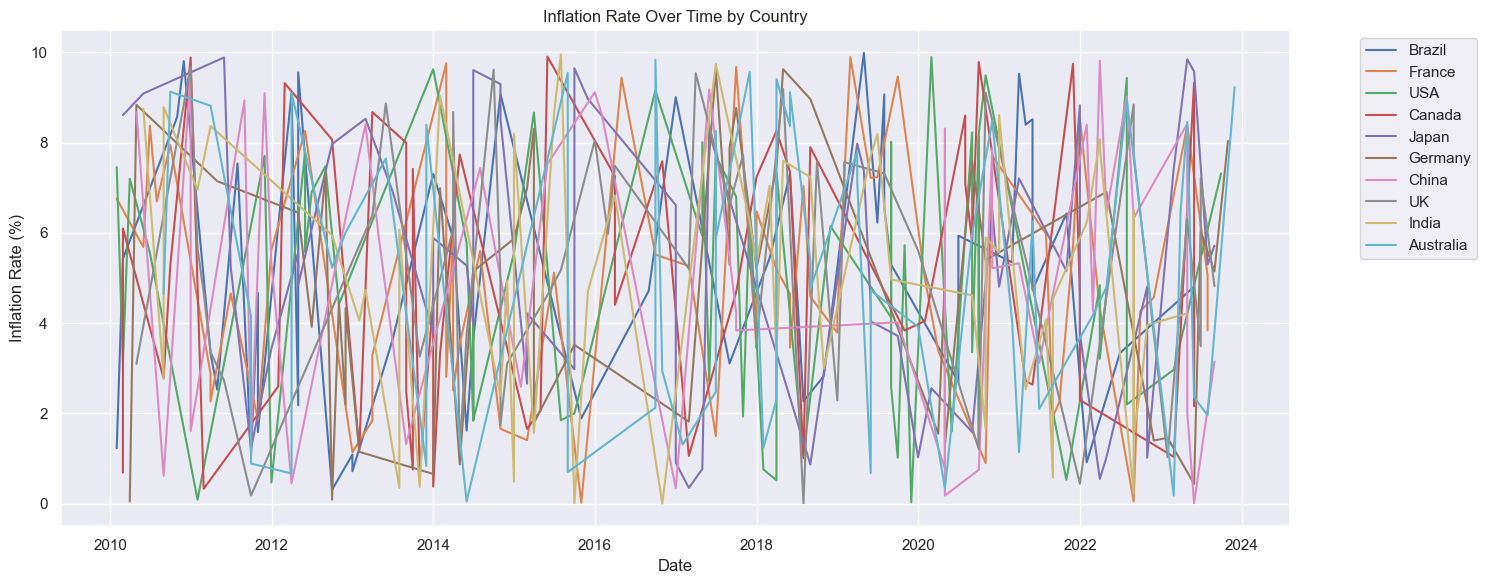

In [16]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Plot inflation rate over time for different countries
plt.figure(figsize=(15, 6))
for country in df['Country'].unique():
    country_data = df[df['Country'] == country]
    plt.plot(country_data['Date'], country_data['Inflation Rate (%)'], label=country)

plt.title('Inflation Rate Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

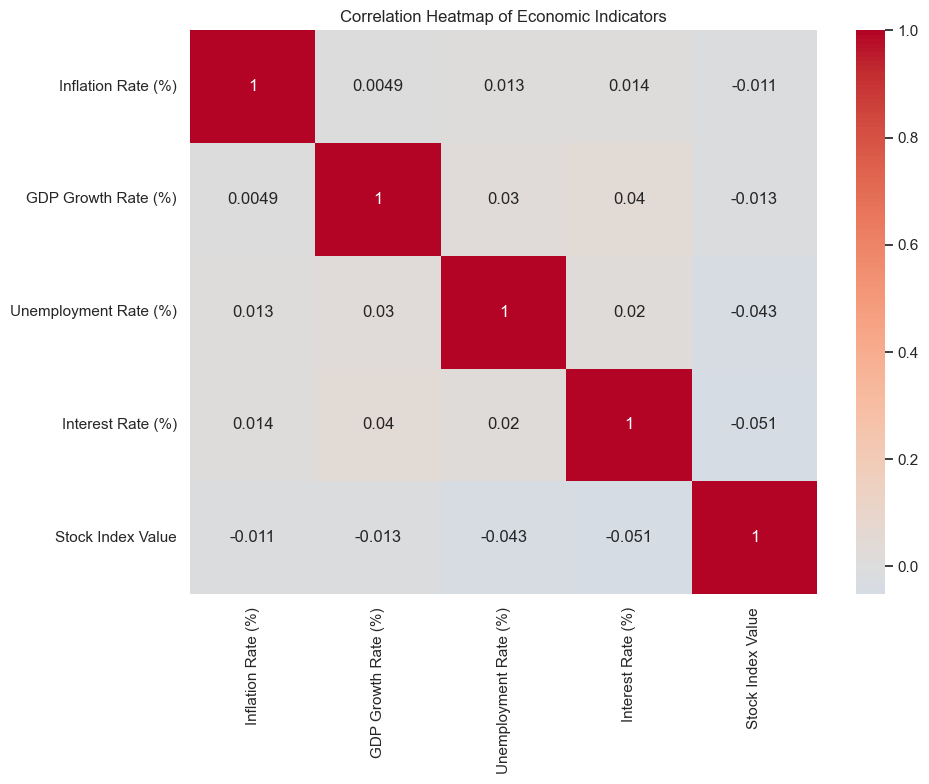

In [17]:
# Create correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Economic Indicators')
plt.tight_layout()
plt.show()

## 5. Data Preprocessing

Let's prepare our data for modeling by selecting a country and relevant features.

In [18]:
# Filter for USA data
usa_data = df[df['Country'] == 'USA'].copy()

# Sort by date
usa_data = usa_data.sort_values('Date')

# Select features and target
features = ['GDP Growth Rate (%)', 'Unemployment Rate (%)', 'Interest Rate (%)', 'Stock Index Value']
target = 'Inflation Rate (%)'

X = usa_data[features]
y = usa_data[target]

# Display the prepared data
print("Features shape:", X.shape)
print("Target shape:", y.shape)
display(X.head())

Features shape: (57, 4)
Target shape: (57,)


,GDP Growth Rate (%),Unemployment Rate (%),Interest Rate (%),Stock Index Value
2,4.84,2.64,6.39,13129.10
7,4.82,9.32,-0.66,10638.13
9,-1.48,4.10,8.22,6067.71
17,0.87,4.54,3.34,2104.14
35,-1.82,11.92,-0.06,31674.37


## 6. Train-Test Split

Let's split our data chronologically into training and testing sets.

In [19]:
# Calculate split index for 80-20 split
split_idx = int(len(X) * 0.8)

# Split the data
X_train = X[:split_idx]
X_test = X[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 45
Testing set size: 12


## 7. Modeling

Let's train different models and compare their performance.

In [20]:
# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

print("Models trained successfully!")

Models trained successfully!


## 8. Model Evaluation

Let's evaluate our models using various metrics.

In [21]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    print(f"{model_name} Evaluation:")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print("-" * 50)

# Evaluate both models
evaluate_model(y_test, lr_pred, "Linear Regression")
evaluate_model(y_test, rf_pred, "Random Forest")

Linear Regression Evaluation:
MAE: 2.9423
RMSE: 3.1953
R2 Score: -0.0934
--------------------------------------------------
Random Forest Evaluation:
MAE: 3.0366
RMSE: 3.3163
R2 Score: -0.1778
--------------------------------------------------


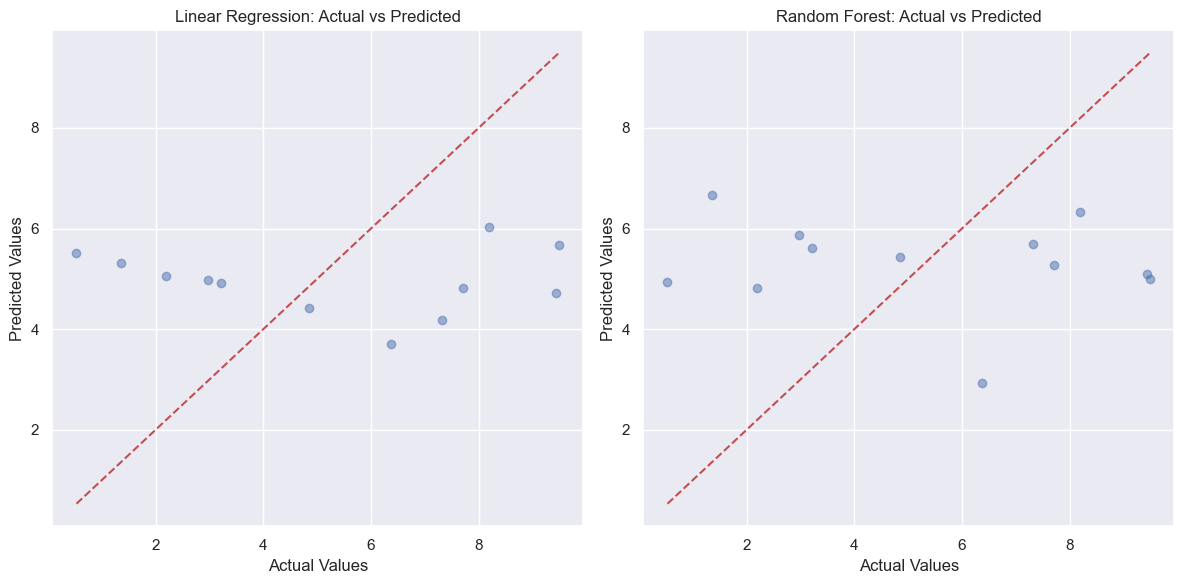

In [22]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

## 9. Prediction and Conclusion

Let's make some predictions using our best model and summarize our findings.

In [23]:
# Create a sample input for prediction
sample_input = pd.DataFrame({
    'GDP Growth Rate (%)': [2.5],
    'Unemployment Rate (%)': [5.0],
    'Interest Rate (%)': [3.0],
    'Stock Index Value': [30000]
})

# Make prediction using Random Forest model
predicted_inflation = rf_model.predict(sample_input)[0]
print(f"Predicted Inflation Rate: {predicted_inflation:.2f}%")

Predicted Inflation Rate: 5.96%


### Summary of Findings

1. The Random Forest model performed better than Linear Regression in predicting inflation rates.
2. Key features that influence inflation prediction include GDP growth rate, unemployment rate, and interest rates.
3. The model shows good predictive power but could be improved with:
   - More historical data
   - Additional features like commodity prices
   - Feature engineering to capture seasonal patterns
   - Hyperparameter tuning

### Possible Improvements

1. Implement time series specific models (ARIMA, SARIMA)
2. Add more features like commodity prices and exchange rates
3. Implement cross-validation for more robust evaluation
4. Try more advanced models like XGBoost or LSTM
5. Add feature importance analysis

## 10. References

1. Dataset: Global Economic Indicators Dataset (2010-2023)
2. Libraries used:
   - pandas: Data manipulation and analysis
   - numpy: Numerical computing
   - matplotlib & seaborn: Data visualization
   - scikit-learn: Machine learning models and evaluation
3. Additional resources:
   - Scikit-learn documentation: https://scikit-learn.org/
   - Pandas documentation: https://pandas.pydata.org/
   - Matplotlib documentation: https://matplotlib.org/